# Methods to connect to Zillow API

This document illustrates all the different methods supported by the Zillow API developed by Team 1

API Details :

**URL** : http://zillowwebapp-receptive-ens.mybluemix.net

**Resources supported **:

* searchclosestgeo - API to search closest 10 properties
* search - to search data based on parameters (including parcel id search)
* propertydesc - fetches the descriptions of all property types or a specific ID
* heatingsystemtype - fetches the descriptions of all heating system types or a specific ID
* airconditiontype - fetches the descriptions of all the Airconditioning types or a specific ID
* propertybyyear - Used to query the number of properties grouped by the year they were buit in or a specific ID
* propertytax - Provides the min,max,avg tax value associated with a particular type of property or a specific ID


#### Method : GET
Since all the queries are search queries and no update / delete queries.
The only method supported in the **GET** method

#### Sample output format

{
  "Message": "Success", 
  "Status": 200, 
  "results": [
      <list of results>
  ]
}

{
  "Message": "No records close to the entered location", 
  "Status": 204, 
  "results": []
}

#### Status codes
200 - Status Success
204 - No Records found
5xx - Error messages for business validations


In [2]:
import pandas as pd
import json, requests
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
import numpy as np
import matplotlib.pyplot as plt

## Enhanced Geospatial Search, Closest Homes
We can query the API to fetch the 10 closest homes near the location provided as parameters in the get query

In [8]:
url='http://zillowwebapp-receptive-ens.mybluemix.net/searchclosestgeo'
params = dict(
    latitude=34.44524,
    longitude=-118.535323
)
resp = requests.get(url=url, params=params)
data = json.loads(resp.text)
print(data['Status'])
print(data['Message'])
df=pd.DataFrame(data['results'])
df

200
Success


,Bathrooms,Bedrooms,City,County,Distance in meters,Latitude,Longitude,Neighborhood,State,Total Area,Zipcode,parcelid
0,3.0,4.0,Valencia,Los Angeles,155.270,34.445143,-118.536716,,California,3556.0,91354,11112172
1,3.0,3.0,Valencia,Los Angeles,165.566,34.444991,-118.536791,,California,2559.0,91354,11112134
2,3.0,3.0,Valencia,Los Angeles,177.427,34.444853,-118.536871,,California,3184.0,91354,11112135
3,3.0,3.0,Valencia,Los Angeles,184.087,34.445282,-118.536978,,California,2730.0,91354,11112171
4,3.0,3.0,Valencia,Los Angeles,193.350,34.444742,-118.536989,,California,2730.0,91354,11112136
5,3.0,3.0,Valencia,Los Angeles,205.373,34.444185,-118.536839,,California,3184.0,91354,11112157
6,3.0,3.0,Valencia,Los Angeles,209.107,34.444616,-118.537097,,California,2730.0,91354,11112137
7,3.0,3.0,Valencia,Los Angeles,209.983,34.443876,-118.536629,,California,2730.0,91354,11112158
8,3.0,4.0,Valencia,Los Angeles,211.797,34.446505,-118.536747,,California,2297.0,91354,11111288
9,2.0,3.0,Valencia,Los Angeles,215.807,34.446643,-118.536664,,California,1245.0,91354,11111283


In [9]:
import folium
#map_osm = folium.Map(location=[45.5236, -122.6750])
map_1 = folium.Map(location=[df.Latitude.mean(),df.Longitude.mean()], zoom_start=15)
for row in df.index:
    #change the column indices later
    popup="Distance : "+str(df.iloc[row]['Distance in meters'])+" metres. Parcel ID : "+str(df.iloc[row].parcelid)+". Neighborhood : "+str(df.iloc[row].Neighborhood)+". City : "+str(df.iloc[row].City)+". Zipcode : "+str(df.iloc[row].Zipcode)
    folium.Marker([float(df.iloc[row].Latitude),float(df.iloc[row].Longitude)], popup=popup).add_to(map_1)
map_1.save("closest10.html")


In [10]:
%%HTML
<iframe width ="100%" height=300 src="closest10.html"></iframe>

## Search
We can query the api using the search url to perform  a search based on the following parameters.

Since the dataset size is huge, this **search API only returns 100 records at a time**. You can request for the next set of 100 records using the start parameter.

**API URL**


**Parameters For the API** (Atleast one parameter is required)
* parcelid
* zipcode (int)
* bathroom (int/float)
* totalarea (float)
* bedroom (int/float)
* yearbuilt (int)
* pool (int)
* heating (int)
* storeys (int)
* propertytype (int)
* aircondition (int)
* start (int) greater than 0 - This is the offset and indicates the index for the next set of results.

Values are returned in json and can be used directly in a dataframe

Query on parcelid (property id)

In [3]:
url = 'http://zillowwebapp-receptive-ens.mybluemix.net/search'
params = dict(
    parcelid=14397743,
)
resp = requests.get(url=url, params=params)
data = json.loads(resp.text)
print(data['Status'])
print(data['Message'])
df=pd.DataFrame(data['results'])
df

200
Success


,AirConditioning,AirConditioningID,AssessmentYear,Bathrooms,Bedrooms,BuildingQuality,FIPS,Garage,HeatingID,HeatingSystem,Latitude,LivingArea,Longitude,NumberOfStories,ParcelID,Pool,PropertyType,PropertyTypeID,TaxAssessedOnStructure,TotalTaxAssessed,TotalTaxForAssessmentYear,YearBuilt,ZIP
0,Central,1,2015,2.0,3.0,0,6059,2.0,6,Forced air,33.54709,2048.0,-117.687917,1,14397743,None,Single Family Residential,261,128128.0,167070.0,1735.12,1978,96987


In [21]:
url = 'http://zillowwebapp-receptive-ens.mybluemix.net/search'
params = dict(
    #parcelid=14397743,
    zipcode=96987,
    bathroom=2.0,
    #totalarea=,
    #bedroom=1.0,
    #yearbuilt=1950,
    #pool=1.0,
    heating=6,
    #storeys=1,
    #propertytype=261,
    aircondition=1,
    start=0
)
resp = requests.get(url=url, params=params)
data = json.loads(resp.text)
print(data['Status'])
print(data['Message'])
df=pd.DataFrame(data['results'])
df

200
Success


,AirConditioning,AirConditioningID,AssessmentYear,Bathrooms,Bedrooms,BuildingQuality,FIPS,Garage,HeatingID,HeatingSystem,Latitude,LivingArea,Longitude,NumberOfStories,ParcelID,Pool,PropertyType,PropertyTypeID,TaxAssessedOnStructure,TotalTaxAssessed,TotalTaxForAssessmentYear,YearBuilt,ZIP
0,Central,1,2015,2.0,2.0,0,6059,2.0,6,Forced air,33.926385,1181.0,-117.961876,1.0,13851988,1.0,Single Family Residential,261,99151.0,289986.0,3471.94,1978,96987
1,Central,1,2015,2.0,3.0,0,6059,2.0,6,Forced air,33.837704,1901.0,-117.921130,1.0,13877030,1.0,Single Family Residential,261,122192.0,358945.0,4345.64,1949,96987
2,Central,1,2015,2.0,3.0,0,6059,2.0,6,Forced air,33.857346,1389.0,-117.953419,1.0,13913213,1.0,Single Family Residential,261,82213.0,304565.0,3620.04,1955,96987
3,Central,1,2015,2.0,4.0,0,6059,2.0,6,Forced air,33.858165,1519.0,-117.944560,1.0,13914800,NaN,Single Family Residential,261,69345.0,425877.0,5030.04,1955,96987
4,Central,1,2015,2.0,3.0,0,6059,0.0,6,Forced air,33.801533,1560.0,-117.945725,1.0,13932350,NaN,Single Family Residential,261,82475.0,268516.0,3435.30,1959,96987
5,Central,1,2015,2.0,2.0,0,6059,2.0,6,Forced air,33.760136,949.0,-117.947640,1.0,13954244,1.0,Single Family Residential,261,34658.0,49350.0,872.48,1973,96987
6,Central,1,2015,2.0,3.0,0,6059,2.0,6,Forced air,33.789062,1818.0,-118.021425,1.0,13999465,NaN,Single Family Residential,261,78733.0,399481.0,5198.16,1960,96987
7,Central,1,2015,2.0,4.0,0,6059,2.0,6,Forced air,33.769554,1683.0,-118.008140,2.0,14092348,1.0,Single Family Residential,261,102320.0,262622.0,3433.86,1963,96987
8,Central,1,2015,2.0,3.0,0,6059,2.0,6,Forced air,33.786793,1357.0,-118.029095,1.0,14100888,1.0,Single Family Residential,261,49807.0,78672.0,1532.64,1974,96987
9,Central,1,2015,2.0,3.0,0,6059,2.0,6,Forced air,33.916537,1468.0,-117.875649,1.0,14158569,NaN,Single Family Residential,261,91793.0,571188.0,6649.48,1971,96987


# Types and description

## Property type description:
We can query for types of properties available and get the description and its associated ID
Following query returns all values as no specific id is provided.

In [22]:
url = 'http://zillowwebapp-receptive-ens.mybluemix.net/propertydesc'
params = dict()
resp = requests.get(url=url, params=params)
data = json.loads(resp.text)
print(data['Status'])
print(data['Message'])
df=pd.DataFrame(data['results'])
df

200
Success


,PropertyLandUseDesc,PropertyLandUseTypeID
0,Commercial/Office/Residential,31
1,Multi-Story Store,46
2,Store/Office (Mixed Use),47
3,"""Duplex (2 Units",246
4,"""Triplex (3 Units",247
5,"""Quadruplex (4 Units",248
6,Residential General,260
7,Single Family Residential,261
8,Rural Residence,262
9,Mobile Home,263


### Property description by specific id (47)
Available id to test [31 46 47 246 247 248 260 261 262 263 264 265 266 267 268 269]

In [24]:
url = 'http://zillowwebapp-receptive-ens.mybluemix.net/propertydesc?proptype=261'
params = dict()
resp = requests.get(url=url, params=params)
data = json.loads(resp.text)
print(data['Status'])
print(data['Message'])
df=pd.DataFrame(data['results'])
df

200
Success


,PropertyLandUseDesc,PropertyLandUseTypeID
0,Single Family Residential,261


## Heating Systems                                                                                                      

We can query for types of heating systems available and get the description and its associated ID.
Following api returns all values as no specific id is provided.**

In [25]:
url = 'http://zillowwebapp-receptive-ens.mybluemix.net/heatingsystemtype'
params = dict()
resp = requests.get(url=url, params=params)
data = json.loads(resp.text)
print(data['Status'])
print(data['Message'])
df=pd.DataFrame(data['results'])
df

200
Success


,HeatingOrSystemDesc,HeatingOrSystemTypeID
0,Baseboard,1
1,Central,2
2,Coal,3
3,Convection,4
4,Electric,5
5,Forced air,6
6,Floor/Wall,7
7,Gas,8
8,Geo Thermal,9
9,Gravity,10


For specific search provide id number as parameter

In [26]:
url = 'http://zillowwebapp-receptive-ens.mybluemix.net/heatingsystemtype?heattype=9'
params = dict()
resp = requests.get(url=url, params=params)
data = json.loads(resp.text)
print(data['Status'])
print(data['Message'])
df=pd.DataFrame(data['results'])
df

200
Success


,HeatingOrSystemDesc,HeatingOrSystemTypeID
0,Geo Thermal,9


### Aircondition systems                                                                                                 
We can query for types of airconditioning types available and get the description and its associated ID
Following api returns all values as no specific id is provided.

In [27]:
url = 'http://zillowwebapp-receptive-ens.mybluemix.net/airconditiontype'
params = dict()
resp = requests.get(url=url, params=params)
data = json.loads(resp.text)
print(data['Status'])
print(data['Message'])
df=pd.DataFrame(data['results'])
df

200
Success


,AirConditioningDesc,AirConditioningTypeID
0,Central,1
1,Chilled Water,2
2,Evaporative Cooler,3
3,Geo Thermal,4
4,None,5
5,Other,6
6,Packaged AC Unit,7
7,Partial,8
8,Refrigeration,9
9,Ventilation,10


For specific search provide id number as parameter

In [28]:
url = 'http://zillowwebapp-receptive-ens.mybluemix.net/airconditiontype?airid=7'
params = dict()
resp = requests.get(url=url, params=params)
data = json.loads(resp.text)
print(data['Status'])
print(data['Message'])
df=pd.DataFrame(data['results'])
df

200
Success


,AirConditioningDesc,AirConditioningTypeID
0,Packaged AC Unit,7


## Properties built by year 

Returns the count of all properties grouped by the year they were built in. To specifically search for properties built in a particular use the Search API.

In [29]:
url = 'http://zillowwebapp-receptive-ens.mybluemix.net/propertybyyear'
params = dict()
resp = requests.get(url=url, params=params)
data = json.loads(resp.text)
print(data['Status'])
print(data['Message'])
df=pd.DataFrame(data['results'])
df

200
Success


,numberofhomes,yearbuilt
0,48491,NaN
1,3,1801.0
2,1,1805.0
3,2,1806.0
4,1,1807.0
5,2,1808.0
6,1,1810.0
7,5,1812.0
8,2,1815.0
9,2,1819.0


** Gives a distribution of properties built by years available**.
Most constructions are between the years 1950 to 1965, with maximum in 1955.

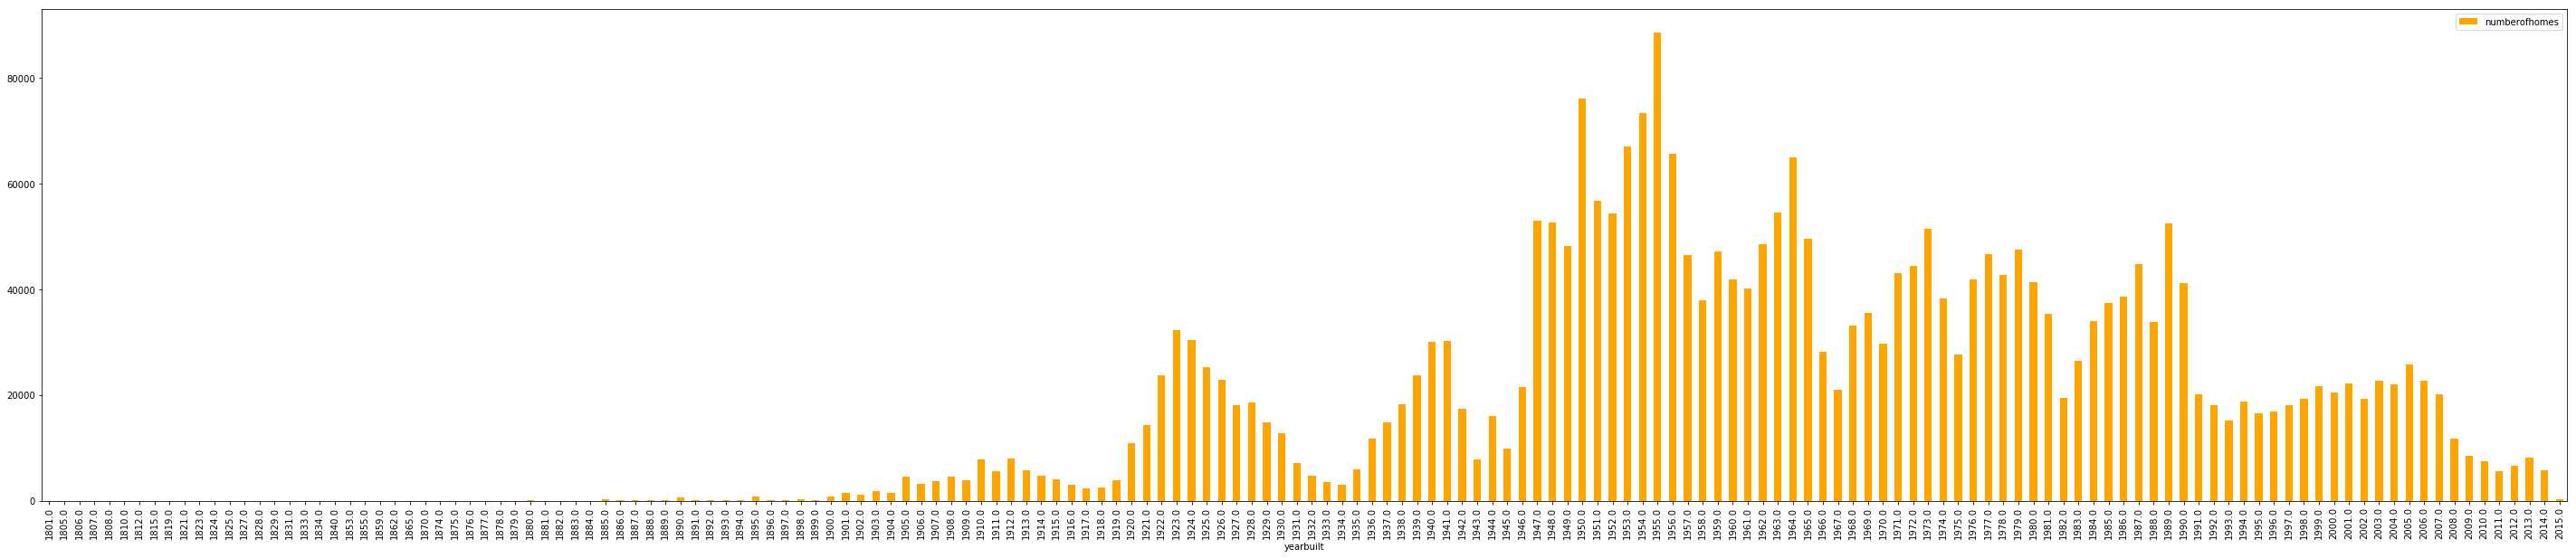

In [20]:
df.dropna().plot(x='yearbuilt', y='numberofhomes',kind='bar',figsize=(50,10),color='orange')
plt.show()


## Tax value for type of properties
This api shows the minimun, maximum and average amount of tax associated with each type of property description

In [6]:
url = 'http://zillowwebapp-receptive-ens.mybluemix.net/propertytax'
params = dict()
resp = requests.get(url=url, params=params)
data = json.loads(resp.text)
print(data['Status'])
print(data['Message'])
df=pd.DataFrame(data['results'])
df

200
Success


,PropertyLandUseDesc,avgtaxvalue,maxtaxvalue,mintaxvalue,propertylandusetypeid
0,Commercial/Office/Residential,6.921381e+05,149613482.0,9.0,31
1,Store/Office (Mixed Use),2.302458e+06,282786000.0,9.0,47
2,"""Duplex (2 Units",3.447795e+05,18751008.0,9.0,246
3,"""Triplex (3 Units",3.794732e+05,12750000.0,9.0,247
4,"""Quadruplex (4 Units",4.713317e+05,17696310.0,9.0,248
5,Residential General,1.960106e+06,164246219.0,10.0,260
6,Single Family Residential,4.379277e+05,96939552.0,1.0,261
7,Mobile Home,4.066309e+04,5369681.0,1.0,263
8,Townhouse,4.750949e+05,16236885.0,85182.0,264
9,Cluster Home,2.733164e+05,2868908.0,8567.0,265


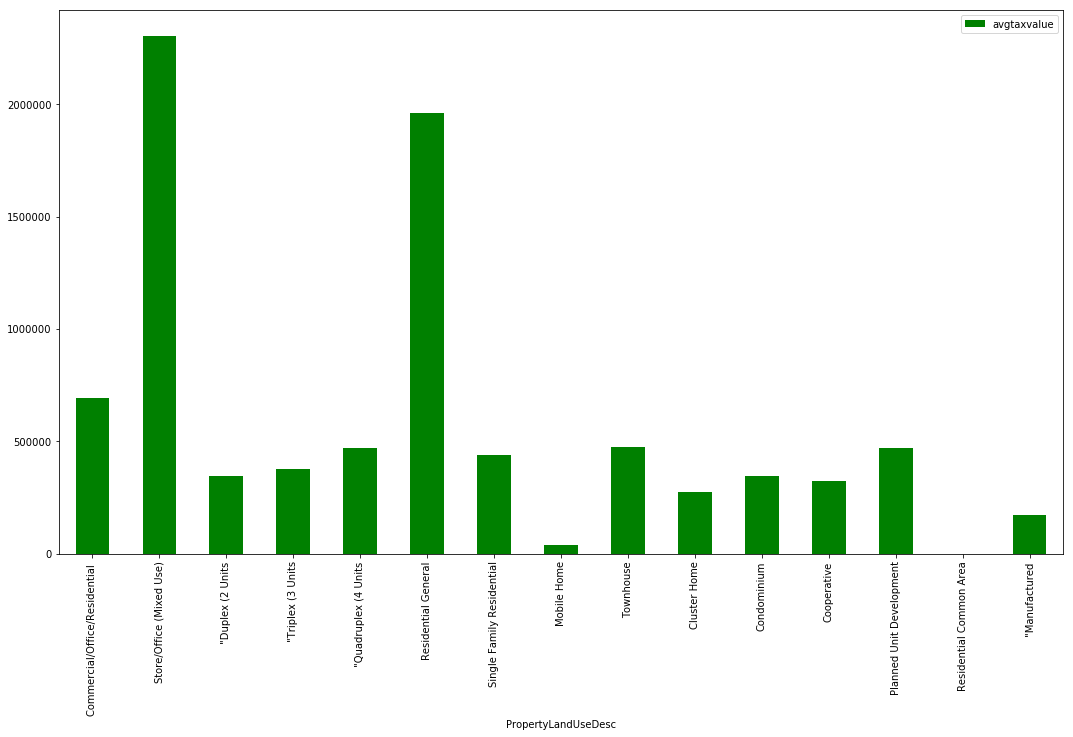

In [5]:
df.plot.bar(x='PropertyLandUseDesc',y='avgtaxvalue',color='green',figsize=(18,10))
plt.show()